In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train[0].shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,), (28, 28))

5


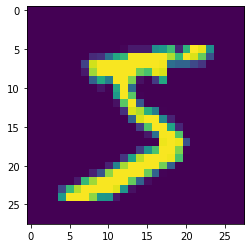

In [22]:
plt.imshow(X_train[0]);
print(y_train[0])

In [23]:
# X_train = X_train / 255
# X_test = X_test / 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [31]:
cnn = keras.Sequential()

cnn.add(keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(keras.layers.MaxPooling2D((2,2)))
cnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        2944      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [32]:
history = cnn.fit(X_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 5s 8ms/step - loss: 0.5673 - accuracy: 0.9043
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0865 - accuracy: 0.9740
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0584 - accuracy: 0.9822
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0455 - accuracy: 0.9852
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0375 - accuracy: 0.9881
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0302 - accuracy: 0.9898
Epoch 8/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0241 - accuracy: 0.9923
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0252 - accuracy: 0.9917
Epoch 10/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0202 - accuracy: 0.9932

In [36]:
(eval_loss, eval_accuracy) = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0753 - accuracy: 0.9823


In [34]:
y_pred = cnn.predict(X_test)

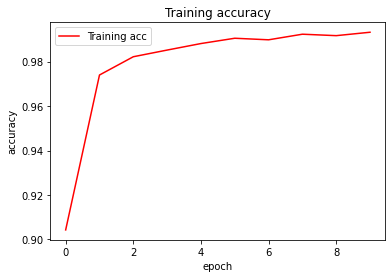

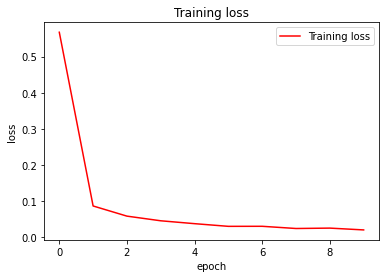

In [39]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()